# **QAI Product Deploy Toolkit**

## Components

,component_id,type,version,size_mb,vendor
0,qai-core,homegrown,1.4.2,120,NaN
1,qai-runtime,homegrown,0.9.0,240,NaN
2,qai-agent,homegrown,2.0.1,30,NaN
3,cots-db,cots,12.3,800,AcmeDB
4,cots-monitor,cots,3.5,200,WatchAll


## Release Summary

,release_id,release_version,strategy,status,deployed_at,deployed_components
0,qai-prod-20251003135834,1.4.2,canary,Promoted,2025-10-03T16:08:34.090505,"qai-core, qai-runtime, qai-agent, cots-db, cot..."


## KPIs

,release_id,deployment_duration_minutes,canary_steps,canary_failure_count,promotion_success,avg_cpu_percent,avg_mem_percent,avg_qpu_error_rate,sla_compliance_pct,mttr_minutes
0,qai-prod-20251003135834,130.0,10,0,True,35.72,47.0,0.0187,99.29,17.88


## Recent Incidents

,note
0,No incidents


## SIEM Alerts

,note
0,No alerts


## Sample Metrics (first 10 rows)

,timestamp,cpu_percent,mem_percent,qpu_error_rate,requests_per_min
0,2025-10-03T13:58:34.090505,39.00,54.53,0.0158,239
1,2025-10-03T14:03:34.090505,32.43,41.74,0.0236,223
2,2025-10-03T14:08:34.090505,35.44,53.48,0.0122,222
3,2025-10-03T14:13:34.090505,39.26,51.39,0.0281,216
4,2025-10-03T14:18:34.090505,36.77,48.37,0.0233,226
5,2025-10-03T14:23:34.090505,35.53,52.00,0.0206,215
6,2025-10-03T14:28:34.090505,32.67,42.25,0.0195,228
7,2025-10-03T14:33:34.090505,36.83,52.89,0.0278,231
8,2025-10-03T14:38:34.090505,38.51,50.29,0.0113,231
9,2025-10-03T14:43:34.090505,39.48,43.16,0.0287,240


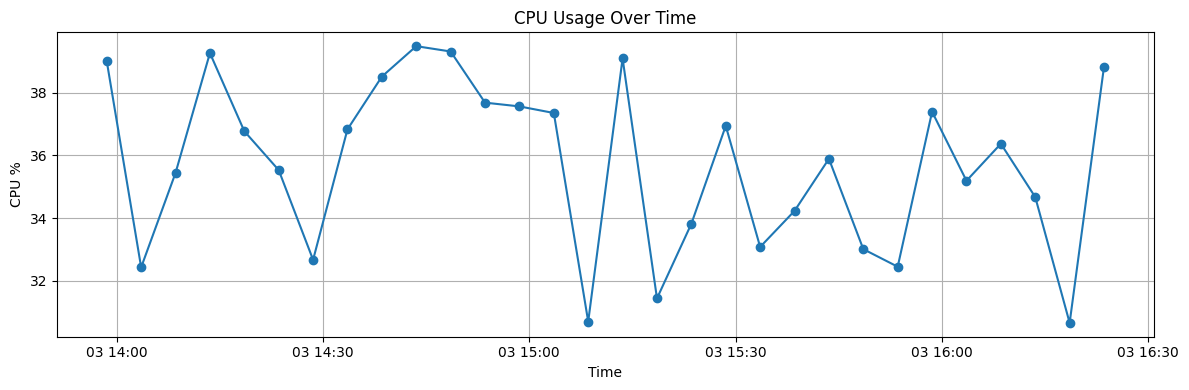

<Figure size 640x480 with 0 Axes>

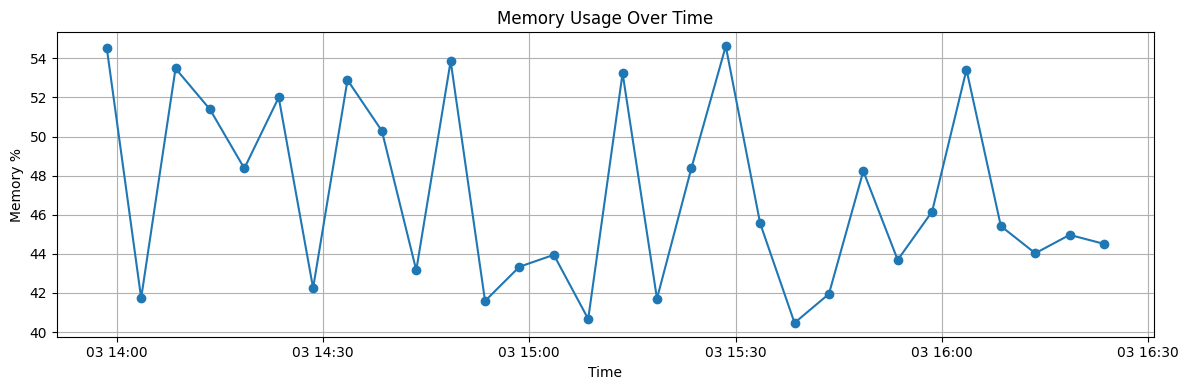

<Figure size 640x480 with 0 Axes>

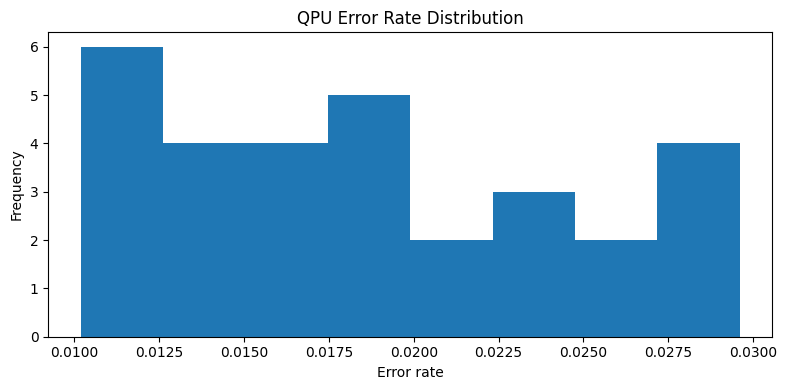

## Generated Files (saved under /mnt/data/qai_deploy_demo)

- alerts.csv

- components.csv

- cpu_usage.png

- events.json

- incidents.csv

- kpis.csv

- mem_usage.png

- metrics.csv

- qpu_error_hist.png

- release_manifest.json

- report_summary.txt

- summary.csv


Simulation run complete. Files saved to: /mnt/data/qai_deploy_demo


<Figure size 640x480 with 0 Axes>

In [2]:
# Colab-ready simulation of QAI_ProductDeploy_Toolkit command-and-control demo
# - Displays charts inline, prints tables, and saves CSV/plots under /mnt/data/qai_deploy_demo
# - No internet required
import os
import json
import random
from pathlib import Path
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Output directory (Colab / Jupyter environment)
OUT_DIR = Path("/mnt/data/qai_deploy_demo")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---------------------
# 1) Components (inputs)
# ---------------------
components = [
    {"component_id": "qai-core", "type": "homegrown", "version": "1.4.2", "size_mb": 120},
    {"component_id": "qai-runtime", "type": "homegrown", "version": "0.9.0", "size_mb": 240},
    {"component_id": "qai-agent", "type": "homegrown", "version": "2.0.1", "size_mb": 30},
    {"component_id": "cots-db", "type": "cots", "vendor": "AcmeDB", "version": "12.3", "size_mb": 800},
    {"component_id": "cots-monitor", "type": "cots", "vendor": "WatchAll", "version": "3.5", "size_mb": 200},
]
components_df = pd.DataFrame(components)

# ---------------------
# 2) Release manifest
# ---------------------
release_manifest = {
    "release_id": "qai-prod-" + datetime.now().strftime("%Y%m%d%H%M%S"),
    "version": "1.4.2",
    "created_at": datetime.now().isoformat(),
    "strategy": "canary",
    "canary": {"weight": 10, "duration_minutes": 60},
    "artifacts": [c["component_id"] for c in components],
    "sbom": [{"name": c["component_id"], "version": c.get("version")} for c in components],
}
with open(OUT_DIR / "release_manifest.json", "w") as f:
    json.dump(release_manifest, f, indent=2)

# ---------------------
# 3) Simulate events / timeline
# ---------------------
start_time = datetime.now()
events = []
def add_event(ts, source, level, message, meta=None):
    events.append({
        "timestamp": ts.isoformat(),
        "source": source,
        "level": level,
        "message": message,
        "meta": meta or {}
    })

# Preflight checks
add_event(start_time, "preflight", "INFO", "Disk space check OK", {"disk_pct_used": 32})
add_event(start_time + timedelta(seconds=5), "preflight", "INFO", "Signature verification OK", {"signature": "valid"})
add_event(start_time + timedelta(seconds=8), "org-framework", "INFO", "Policy validation OK", {"policies_applied": 5})

# Canary rollout (simulate up to N steps; possible failure)
canary_total_steps = 10
failure_occurred = False
for i in range(canary_total_steps):
    ts = start_time + timedelta(minutes=10*i + 1)
    weight = release_manifest["canary"]["weight"] + i
    success = random.random() > 0.05  # 95% success probability per step
    if success:
        add_event(ts, "deployment-engine", "INFO", f"Canary step {i+1}/{canary_total_steps} succeeded", {"weight": weight})
    else:
        add_event(ts, "deployment-engine", "ERROR", f"Canary step {i+1} failed - rolling back", {"weight": weight})
        inc_ts = ts + timedelta(seconds=3)
        add_event(inc_ts, "incident-manager", "CRITICAL", "Service degradation detected - initiating rollback", {"step": i+1})
        failure_occurred = True
        break

# Promotion or abort
promote_time = start_time + timedelta(minutes=10*canary_total_steps + 30)
if not failure_occurred:
    add_event(promote_time, "deployment-engine", "INFO", "Promotion to production started", {"strategy": "canary->production"})
    add_event(promote_time + timedelta(seconds=15), "deployment-engine", "INFO", "Promotion complete", {"release_id": release_manifest["release_id"]})
else:
    add_event(promote_time, "deployment-engine", "INFO", "Promotion aborted due to canary failure", {"strategy": "canary->halt"})

# ---------------------
# 4) Simulate metrics timeseries
# ---------------------
metrics_timestamps = [start_time + timedelta(minutes=5*i) for i in range(30)]
metrics = []
for ts in metrics_timestamps:
    metrics.append({
        "timestamp": ts.isoformat(),
        "cpu_percent": round(30 + 10*random.random(), 2),
        "mem_percent": round(40 + 15*random.random(), 2),
        "qpu_error_rate": round(0.01 + 0.02*random.random(), 4),
        "requests_per_min": int(200 + 50*random.random())
    })
metrics_df = pd.DataFrame(metrics)

# ---------------------
# 5) Derive SIEM-style alerts and incidents
# ---------------------
alerts = []
for e in events:
    lvl = e["level"]
    if lvl in ("ERROR", "CRITICAL"):
        alerts.append({
            "alert_time": e["timestamp"],
            "severity": "HIGH" if lvl == "CRITICAL" else "MEDIUM",
            "source": e["source"],
            "description": e["message"],
            "recommendation": "Investigate and rollback if required" if lvl == "CRITICAL" else "Monitor and assess"
        })
alerts_df = pd.DataFrame(alerts)

inc_df = pd.DataFrame([e for e in events if e["level"] in ("ERROR", "CRITICAL")])

# ---------------------
# 6) KPIs
# ---------------------
deployment_duration_seconds = (promote_time - start_time).total_seconds()
kpis = {
    "release_id": release_manifest["release_id"],
    "deployment_duration_minutes": round(deployment_duration_seconds/60, 2),
    "canary_steps": canary_total_steps,
    "canary_failure_count": int((inc_df['level'] == 'ERROR').sum() if not inc_df.empty else 0),
    "promotion_success": False if failure_occurred else True,
    "avg_cpu_percent": round(metrics_df["cpu_percent"].mean(),2),
    "avg_mem_percent": round(metrics_df["mem_percent"].mean(),2),
    "avg_qpu_error_rate": round(metrics_df["qpu_error_rate"].mean(),4),
    "sla_compliance_pct": round(99.5 - random.random(), 2),
    "mttr_minutes": round(20*random.random(), 2)
}
kpi_df = pd.DataFrame([kpis])

summary = {
    "release_id": release_manifest["release_id"],
    "release_version": release_manifest["version"],
    "strategy": release_manifest["strategy"],
    "status": "Promoted" if kpis["promotion_success"] else "RolledBack",
    "deployed_at": promote_time.isoformat(),
    "deployed_components": ", ".join(release_manifest["artifacts"])
}
summary_df = pd.DataFrame([summary])

# ---------------------
# 7) Persist CSVs / JSON reports / events
# ---------------------
components_df.to_csv(OUT_DIR / "components.csv", index=False)
metrics_df.to_csv(OUT_DIR / "metrics.csv", index=False)
inc_df.to_csv(OUT_DIR / "incidents.csv", index=False)
alerts_df.to_csv(OUT_DIR / "alerts.csv", index=False)
kpi_df.to_csv(OUT_DIR / "kpis.csv", index=False)
summary_df.to_csv(OUT_DIR / "summary.csv", index=False)
with open(OUT_DIR / "events.json", "w") as f:
    json.dump(events, f, indent=2)
with open(OUT_DIR / "report_summary.txt", "w") as f:
    f.write(f"Release {release_manifest['release_id']} status: {summary['status']}\n")

# ---------------------
# 8) Display tables inline
# ---------------------
display(Markdown("## Components"))
display(components_df)

display(Markdown("## Release Summary"))
display(summary_df)

display(Markdown("## KPIs"))
display(kpi_df)

display(Markdown("## Recent Incidents"))
display(inc_df if not inc_df.empty else pd.DataFrame([{"note":"No incidents"}]))

display(Markdown("## SIEM Alerts"))
display(alerts_df if not alerts_df.empty else pd.DataFrame([{"note":"No alerts"}]))

display(Markdown("## Sample Metrics (first 10 rows)"))
display(metrics_df.head(10))

# ---------------------
# 9) Plots (inline) and save them to OUT_DIR
# ---------------------
# CPU usage
plt.figure(figsize=(12,4))
plt.plot(pd.to_datetime(metrics_df['timestamp']), metrics_df['cpu_percent'], marker='o')
plt.title("CPU Usage Over Time")
plt.xlabel("Time"); plt.ylabel("CPU %"); plt.grid(True)
plt.tight_layout(); plt.show()
cpu_plot_path = OUT_DIR / "cpu_usage.png"
plt.savefig(cpu_plot_path); plt.clf()

# Memory usage
plt.figure(figsize=(12,4))
plt.plot(pd.to_datetime(metrics_df['timestamp']), metrics_df['mem_percent'], marker='o')
plt.title("Memory Usage Over Time")
plt.xlabel("Time"); plt.ylabel("Memory %"); plt.grid(True)
plt.tight_layout(); plt.show()
mem_plot_path = OUT_DIR / "mem_usage.png"
plt.savefig(mem_plot_path); plt.clf()

# QPU error rate histogram
plt.figure(figsize=(8,4))
plt.hist(metrics_df['qpu_error_rate'], bins=8)
plt.title("QPU Error Rate Distribution")
plt.xlabel("Error rate"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()
qpu_plot_path = OUT_DIR / "qpu_error_hist.png"
plt.savefig(qpu_plot_path); plt.clf()

# SIEM severity pie (only if alerts exist)
if not alerts_df.empty:
    severity_counts = alerts_df['severity'].value_counts()
    plt.figure(figsize=(6,4))
    plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%')
    plt.title("SIEM Alerts by Severity")
    plt.tight_layout(); plt.show()
    siem_plot_path = OUT_DIR / "siem_severity_pie.png"
    plt.savefig(siem_plot_path); plt.clf()
else:
    siem_plot_path = None

# ---------------------
# 10) Show generated files list (informative)
# ---------------------
display(Markdown("## Generated Files (saved under /mnt/data/qai_deploy_demo)"))
for p in sorted(OUT_DIR.glob("*")):
    display(Markdown(f"- {p.name}"))

print("\nSimulation run complete. Files saved to:", OUT_DIR)


**Concept and execution by Bhadale IT, code generated by ChatGPT**